In [1]:
import pandas as pd

Датасет содержит следующие признаки:

age — возраст

sex — пол (1 - мужчина, 0 - женщина)

cp — тип боли в груди (4 значения)

trestbps — артериальное давление в покое

chol — холестерин сыворотки в мг/дл

fbs — уровень сахара в крови натощак > 120 мг/дл

restecg — результаты электрокардиографии в покое (значения 0,1,2)

thalach — достигнута максимальная частота сердечных сокращений

exang — стенокардия, вызванная физической нагрузкой

oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя

slope — наклон пикового сегмента ST при нагрузке

ca — количество крупных сосудов (0-3), окрашенных при флюроскопии

thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект


In [2]:
heart=pd.read_csv('data/heart.csv')

In [3]:
df_copy=heart.copy()

In [4]:
df_copy['old']=df_copy['age'].apply(lambda x: 1 if x > 60 else 0)

In [5]:
df_copy['old'].sum()

79

In [6]:
import numpy as np

age_intervals = pd.cut(df_copy.age, bins=[0, 20, 30, 40, 50, 60, np.inf])

trestbps_man = {0: 123, 1: 126, 2:129, 3:135, 4:142, 5:142}
trestbps_woman = {0: 116, 1: 120, 2:127, 3:137, 4:144, 5:169}

df_copy['trestbps_mean'] = 0
df_copy.loc[df_copy.sex == 1, 'trestbps_mean'] = age_intervals.cat.codes.map(trestbps_man)
df_copy.loc[df_copy.sex == 0, 'trestbps_mean'] = age_intervals.cat.codes.map(trestbps_woman)

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [8]:
import category_encoders as ce

In [9]:
df_copy['cp']=df_copy['cp'].astype('category')
df_copy['restecg']=df_copy['restecg'].astype('category')
df_copy['slope']=df_copy['slope'].astype('category')
df_copy['ca']=df_copy['ca'].astype('category')
df_copy['thal']=df_copy['thal'].astype('category')


In [10]:
encoder = ce.OneHotEncoder(df_copy[['cp', 'restecg', 'slope', 'ca', 'thal']]) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df_copy[['cp', 'restecg', 'slope', 'ca', 'thal']])
df_copy = pd.concat([df_copy, type_bin], axis=1)

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            303 non-null    float64 
 1   sex            303 non-null    int64   
 2   cp             303 non-null    category
 3   trestbps       303 non-null    float64 
 4   chol           303 non-null    float64 
 5   fbs            303 non-null    int64   
 6   restecg        303 non-null    category
 7   thalach        303 non-null    float64 
 8   exang          303 non-null    int64   
 9   oldpeak        303 non-null    float64 
 10  slope          303 non-null    category
 11  ca             303 non-null    category
 12  thal           303 non-null    category
 13  target         303 non-null    int64   
 14  old            303 non-null    int64   
 15  trestbps_mean  303 non-null    int64   
 16  cp_1           303 non-null    int64   
 17  cp_2           303 non-null    int6

In [13]:
# для нормализации, стандартизации
from sklearn import preprocessing

In [17]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_copy[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = r_scaler.fit_transform(df_copy[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [18]:
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,...,0,1,0,0,0,0,1,0,0,0
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,...,0,1,0,0,0,0,0,1,0,0
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,...,0,1,0,0,0,0,0,1,0,0
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,...,0,1,0,0,0,0,0,1,0,0
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,...,0,1,0,0,0,0,0,1,0,0


In [20]:
round(df_copy['chol'].std(), 6)

0.816232

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            303 non-null    float64 
 1   sex            303 non-null    int64   
 2   cp             303 non-null    category
 3   trestbps       303 non-null    float64 
 4   chol           303 non-null    float64 
 5   fbs            303 non-null    int64   
 6   restecg        303 non-null    category
 7   thalach        303 non-null    float64 
 8   exang          303 non-null    int64   
 9   oldpeak        303 non-null    float64 
 10  slope          303 non-null    category
 11  ca             303 non-null    category
 12  thal           303 non-null    category
 13  target         303 non-null    int64   
 14  old            303 non-null    int64   
 15  trestbps_mean  303 non-null    int64   
 16  cp_1           303 non-null    int64   
 17  cp_2           303 non-null    int6

In [41]:
df_copy[['slope', 'slope_3']].corr()

,slope_3
slope_3,1.0


<AxesSubplot:>

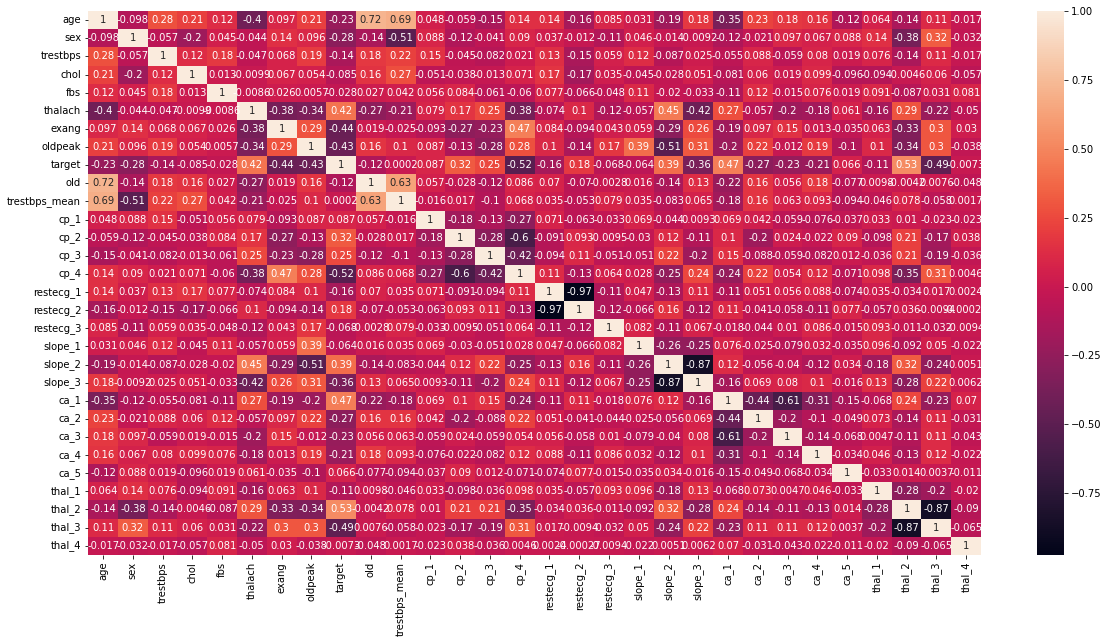

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_copy.corr(), annot=True) # включаем отображение коэффициентов